# Truth Tables and BitVec Encoding

This notebook explains how the Nice Connectives project represents truth tables using BitVec encoding.

## Learning Objectives

By the end of this notebook, you will understand:
- How truth tables are encoded as integers (BitVec representation)
- The row indexing scheme for n-ary connectives
- How to decode truth table values
- Ternary connectives and their 256 possibilities
- The naming convention (f{arity}_{truth_table})

In [1]:
# Setup Python path to find the src module
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"✓ Project root added to path: {project_root}")

✓ Project root added to path: /home/benjamin/Documents/Philosophy/Projects/Z3/nice_connectives


## 0. Python Path Setup

First, let's ensure Python can find the project modules:

In [2]:
# Setup
from src.connectives import Connective
from src.constants import AND, OR, XOR, NOT
from notebooks.utils import display_truth_table, visualize_truth_table

import matplotlib.pyplot as plt
%matplotlib inline

print("✓ Setup complete")

✓ Setup complete


## 1. BitVec Encoding

### The Key Idea

Truth tables are represented as **integers** where each bit corresponds to one row's output.

**Bit i** of the integer = **output for row i**

### Example: AND Connective

In [3]:
# AND has truth table value 8
print(f"AND truth table value: {AND.truth_table_int}")
print(f"Binary representation: 0b{AND.truth_table_int:04b}")
print()
print("Truth table:")
print(display_truth_table(AND))

AND truth table value: 8
Binary representation: 0b1000

Truth table:
   x0  x1  output
0   0   0       0
1   1   0       0
2   0   1       0
3   1   1       1


### Decoding the Bits

Let's see how the bits correspond to rows:

In [4]:
# Decode AND truth table
tt_value = AND.truth_table_int  # 8 = 0b1000

print("Row | Inputs | Bit | Output")
print("----+--------+-----+-------")
for row in range(4):
    x0 = (row >> 0) & 1
    x1 = (row >> 1) & 1
    bit = (tt_value >> row) & 1
    print(f" {row}  | ({x0},{x1})  |  {bit}  |   {AND.evaluate(x0, x1)}")

Row | Inputs | Bit | Output
----+--------+-----+-------
 0  | (0,0)  |  0  |   0
 1  | (1,0)  |  0  |   0
 2  | (0,1)  |  0  |   0
 3  | (1,1)  |  1  |   1


## 2. Row Indexing Scheme

For an n-ary connective, row numbers are computed by interpreting inputs as an n-bit binary number.

### Binary Connectives (arity 2)

Row number = x0 + 2×x1

| x0 | x1 | Row |
|----|----| ---- |
| 0  | 0  | 0   |
| 1  | 0  | 1   |
| 0  | 1  | 2   |
| 1  | 1  | 3   |

In [5]:
# Demonstrate row indexing for binary connectives
print("Binary connective row indexing:")
for x0 in [0, 1]:
    for x1 in [0, 1]:
        row = x0 + 2*x1
        print(f"  ({x0},{x1}) → row {row}")

Binary connective row indexing:
  (0,0) → row 0
  (0,1) → row 2
  (1,0) → row 1
  (1,1) → row 3


### Ternary Connectives (arity 3)

Row number = x0 + 2×x1 + 4×x2

This gives us 2³ = 8 rows:

In [6]:
# Demonstrate row indexing for ternary connectives
print("Ternary connective row indexing:")
print("(x0,x1,x2) → row")
for x0 in [0, 1]:
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            row = x0 + 2*x1 + 4*x2
            print(f"  ({x0},{x1},{x2}) → row {row}")

Ternary connective row indexing:
(x0,x1,x2) → row
  (0,0,0) → row 0
  (0,0,1) → row 4
  (0,1,0) → row 2
  (0,1,1) → row 6
  (1,0,0) → row 1
  (1,0,1) → row 5
  (1,1,0) → row 3
  (1,1,1) → row 7


## 3. Naming Convention

Connectives are named using the pattern: **f{arity}_{truth_table}**

Examples:
- `f2_8` = Binary connective with truth table 8 (AND)
- `f2_6` = Binary connective with truth table 6 (XOR)
- `f3_150` = Ternary connective with truth table 150

In [7]:
# Show naming for common connectives
print("Connective naming examples:")
for conn in [AND, OR, XOR, NOT]:
    print(f"  {conn.name:10} = f{conn.arity}_{conn.truth_table_int}")

Connective naming examples:
  AND        = f2_8
  OR         = f2_14
  XOR        = f2_6
  NOT        = f1_1


## 4. Example: XOR Decoding

Let's decode XOR (truth table value 6):

In [8]:
# XOR has truth table value 6
print(f"XOR truth table value: {XOR.truth_table_int}")
print(f"Binary: 0b{XOR.truth_table_int:04b}")
print()

# Decode bit by bit
print("Decoding XOR:")
tt = XOR.truth_table_int
for row in range(4):
    x0 = (row >> 0) & 1
    x1 = (row >> 1) & 1
    bit = (tt >> row) & 1
    print(f"  Row {row}: ({x0},{x1}) → bit {bit}")

print()
print("Full truth table:")
print(display_truth_table(XOR))

XOR truth table value: 6
Binary: 0b0110

Decoding XOR:
  Row 0: (0,0) → bit 0
  Row 1: (1,0) → bit 1
  Row 2: (0,1) → bit 1
  Row 3: (1,1) → bit 0

Full truth table:
   x0  x1  output
0   0   0       0
1   1   0       1
2   0   1       1
3   1   1       0


## 5. Ternary Connectives

Ternary connectives have 3 inputs, giving 2³ = 8 rows.
This means 2⁸ = **256 possible ternary connectives**.

Truth table values range from 0 to 255.

### Example: f3_150 (Ternary Majority)

Let's explore a ternary connective:

In [9]:
# Create f3_150
f3_150 = Connective(3, 150)

print(f"Connective: {f3_150.name}")
print(f"Truth table value: {f3_150.truth_table_int}")
print(f"Binary: 0b{f3_150.truth_table_int:08b}")
print()
print("Truth table:")
print(display_truth_table(f3_150))

Connective: f3_150
Truth table value: 150
Binary: 0b10010110

Truth table:
   x0  x1  x2  output
0   0   0   0       0
1   1   0   0       1
2   0   1   0       1
3   1   1   0       0
4   0   0   1       1
5   1   0   1       0
6   0   1   1       0
7   1   1   1       1


This is the **ternary majority function** - it returns 1 when at least 2 of the 3 inputs are 1.

Let's verify:

In [10]:
# Verify majority function
print("Verifying f3_150 is majority:")
for x0 in [0, 1]:
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            output = f3_150.evaluate(x0, x1, x2)
            count_ones = x0 + x1 + x2
            expected = 1 if count_ones >= 2 else 0
            match = "✓" if output == expected else "✗"
            print(f"  ({x0},{x1},{x2}): {count_ones} ones → output {output}, expected {expected} {match}")

Verifying f3_150 is majority:
  (0,0,0): 0 ones → output 0, expected 0 ✓
  (0,0,1): 1 ones → output 1, expected 0 ✗
  (0,1,0): 1 ones → output 1, expected 0 ✗
  (0,1,1): 2 ones → output 0, expected 1 ✗
  (1,0,0): 1 ones → output 1, expected 0 ✗
  (1,0,1): 2 ones → output 0, expected 1 ✗
  (1,1,0): 2 ones → output 0, expected 1 ✗
  (1,1,1): 3 ones → output 1, expected 1 ✓


### Example: f3_19

Let's look at another ternary connective from the size-35 nice set:

In [11]:
# Create f3_19
f3_19 = Connective(3, 19)

print(f"Connective: {f3_19.name}")
print(f"Binary: 0b{f3_19.truth_table_int:08b}")
print()
print(display_truth_table(f3_19))
print()
print("See the glossary for more details:")
print("../glossary/connectives.md")

Connective: f3_19
Binary: 0b00010011

   x0  x1  x2  output
0   0   0   0       1
1   1   0   0       1
2   0   1   0       0
3   1   1   0       0
4   0   0   1       1
5   1   0   1       0
6   0   1   1       0
7   1   1   1       0

See the glossary for more details:
../glossary/connectives.md


## 6. Exploring Ternary Space

Let's sample some ternary connectives:

In [12]:
# Sample ternary connectives
import random
random.seed(42)

sample_values = random.sample(range(256), 5)
sample_connectives = [Connective(3, v) for v in sample_values]

print("Sample ternary connectives:")
for conn in sample_connectives:
    print(f"\n{conn.name} (binary: 0b{conn.truth_table_int:08b}):")
    print(display_truth_table(conn))

Sample ternary connectives:

f3_57 (binary: 0b00111001):
   x0  x1  x2  output
0   0   0   0       1
1   1   0   0       1
2   0   1   0       0
3   1   1   0       0
4   0   0   1       0
5   1   0   1       1
6   0   1   1       1
7   1   1   1       0

f3_12 (binary: 0b00001100):
   x0  x1  x2  output
0   0   0   0       0
1   1   0   0       0
2   0   1   0       1
3   1   1   0       0
4   0   0   1       0
5   1   0   1       0
6   0   1   1       1
7   1   1   1       0

f3_140 (binary: 0b10001100):
   x0  x1  x2  output
0   0   0   0       0
1   1   0   0       0
2   0   1   0       1
3   1   1   0       0
4   0   0   1       0
5   1   0   1       0
6   0   1   1       1
7   1   1   1       1

f3_125 (binary: 0b01111101):
   x0  x1  x2  output
0   0   0   0       1
1   1   0   0       1
2   0   1   0       1
3   1   1   0       1
4   0   0   1       0
5   1   0   1       1
6   0   1   1       1
7   1   1   1       0

f3_114 (binary: 0b01110010):
   x0  x1  x2  output
0   0   0 

## 7. Interactive Exercise: Decode a Truth Table

Given truth table value 170 for a ternary connective, what is the output pattern?

In [13]:
# Create f3_170
f3_170 = Connective(3, 170)

print(f"Binary: 0b{170:08b} = 10101010")
print()
print(display_truth_table(f3_170))
print()
print("Pattern: output alternates 0,1,0,1,0,1,0,1")
print("This means: output = x0 (projection onto first input)")

Binary: 0b10101010 = 10101010

   x0  x1  x2  output
0   0   0   0       0
1   1   0   0       0
2   0   1   0       0
3   1   1   0       0
4   0   0   1       1
5   1   0   1       1
6   0   1   1       1
7   1   1   1       1

Pattern: output alternates 0,1,0,1,0,1,0,1
This means: output = x0 (projection onto first input)


## 8. Visualizing Ternary Connectives

Ternary truth tables are larger (8 rows), but we can still visualize them:

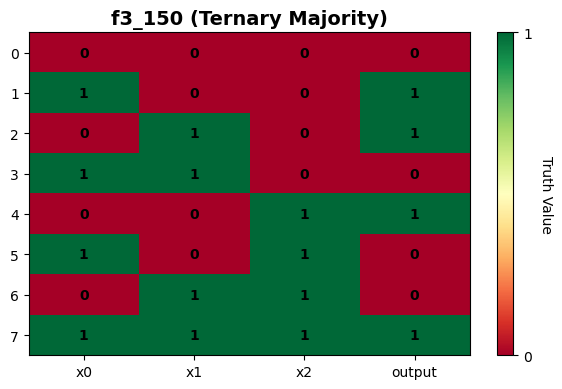

In [14]:
# Visualize a ternary connective
fig = visualize_truth_table(f3_150, title="f3_150 (Ternary Majority)")
plt.show()

## Summary

In this notebook, you learned:
- ✓ How truth tables are encoded as integers (BitVec)
- ✓ Row indexing scheme: row = x0 + 2×x1 + 4×x2 + ...
- ✓ Naming convention: f{arity}_{truth_table}
- ✓ Ternary connectives have 256 possibilities
- ✓ How to decode truth table values

## Next Steps

- **03_completeness.ipynb** - Post's completeness theorem
- **04_independence.ipynb** - Independence checking
- **[Glossary](../glossary/connectives.md)** - Complete ternary connectives reference